# Machine Learning 1 - Nearest Neighbors and Decision Trees

## Lab objectives

* Classification with decision trees and random forests.
* Cross-validation and evaluation.

In [3]:
from lab_tools import CIFAR10, get_hog_image

dataset = CIFAR10('./CIFAR10/')

Pre-loading training data
Pre-loading test data


# 1. Nearest Neighbor

The following example uses the Nearest Neighbor algorithm on the Histogram of Gradient decriptors in the dataset.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit( dataset.train['hog'], dataset.train['labels'] )

KNeighborsClassifier(n_neighbors=1)

* What is the **descriptive performance** of this classifier ?
* Modify the code to estimate the **predictive performance**.
* Use cross-validation to find the best hyper-parameters for this method.

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
pred = clf.predict(dataset.train['hog'])
score = accuracy_score(dataset.train['labels'], pred)
print("Descriptive score", score)
cm = confusion_matrix(dataset.train['labels'], pred)
print(cm)

Descriptive score 1.0
[[5000    0    0]
 [   0 5000    0]
 [   0    0 5000]]


In [5]:
pred = clf.predict(dataset.test['hog'])
score = accuracy_score(dataset.test['labels'], pred)
print("Predictive score", score)
cm = confusion_matrix(dataset.test['labels'], pred)
print(cm)

Predictive score 0.694
[[609 258 133]
 [ 63 754 183]
 [ 26 255 719]]


Les différents hyperparameters sont les suivants :

In [6]:
n_neighbors = [1, 2, 3]
weights = ['uniform', 'distance']
p = [1, 2]

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [8]:
for n in n_neighbors:
    print("Number of neighbors ", n)
    for w in weights:
        print("Weights ", w)
        for power in p:
            print("Power ", power)
            clf = KNeighborsClassifier(n_neighbors=n, weights=w, p=power)
            scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
            mean = np.mean(scores)
            print("La moyenne est ", mean)

Number of neighbors  1
Weights  uniform
Power  1
La moyenne est  0.7456
Power  2
La moyenne est  0.6878
Weights  distance
Power  1
La moyenne est  0.7456
Power  2
La moyenne est  0.6878
Number of neighbors  2
Weights  uniform
Power  1
La moyenne est  0.7438
Power  2
La moyenne est  0.6868666666666667
Weights  distance
Power  1
La moyenne est  0.7456
Power  2
La moyenne est  0.6878
Number of neighbors  3
Weights  uniform
Power  1
La moyenne est  0.7695333333333333
Power  2
La moyenne est  0.7060666666666666
Weights  distance
Power  1
La moyenne est  0.7635333333333333
Power  2
La moyenne est  0.6988


Plus le nombre de neighbors est grand, meilleure est l'accuracy. Power = 1 donne systématiquement des meilleurs résultats que power = 2.
Pour neighbors = 3, weight = 'distance' était mieux.

In [9]:
n_neighbors = [3, 4, 5]
leaf_size = [20, 30, 40]
for n in n_neighbors:
    print("Number of neighbors ", n)
    for w in weights:
        print("Weights ", w)
        for leaf in leaf_size:
            print("Leaf size ", leaf)
            clf = KNeighborsClassifier(n_neighbors=n, weights=w, leaf_size=leaf)
            scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
            mean = np.mean(scores)
            print("La moyenne est ", mean)

Number of neighbors  3
Weights  uniform
Leaf size  20
La moyenne est  0.7060666666666666
Leaf size  30
La moyenne est  0.7060666666666666
Leaf size  40
La moyenne est  0.7060666666666666
Weights  distance
Leaf size  20
La moyenne est  0.6988
Leaf size  30
La moyenne est  0.6988
Leaf size  40
La moyenne est  0.6988
Number of neighbors  4
Weights  uniform
Leaf size  20
La moyenne est  0.7002
Leaf size  30
La moyenne est  0.7002
Leaf size  40
La moyenne est  0.7002
Weights  distance
Leaf size  20
La moyenne est  0.7051999999999999
Leaf size  30
La moyenne est  0.7051999999999999
Leaf size  40
La moyenne est  0.7051999999999999
Number of neighbors  5
Weights  uniform
Leaf size  20
La moyenne est  0.7097333333333333
Leaf size  30
La moyenne est  0.7097333333333333
Leaf size  40
La moyenne est  0.7097333333333333
Weights  distance
Leaf size  20
La moyenne est  0.7029333333333333
Leaf size  30
La moyenne est  0.7029333333333333
Leaf size  40
La moyenne est  0.7029333333333333


In [17]:
n_neighbors = [3, 4, 5]
leaf_size = [30, 50]
for n in n_neighbors:
    print("Number of neighbors ", n)
    for leaf in leaf_size:
        print("Leaf size ", leaf)
        clf = KNeighborsClassifier(n_neighbors=n, weights='uniform', leaf_size=leaf, p=1)
        scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
        mean = np.mean(scores)
        print("La moyenne est ", mean)

Number of neighbors  3
Leaf size  30
La moyenne est  0.7695333333333333
Leaf size  50
La moyenne est  0.7695333333333333
Number of neighbors  4
Leaf size  30
La moyenne est  0.7636
Leaf size  50
La moyenne est  0.7636
Number of neighbors  5
Leaf size  30
La moyenne est  0.7752666666666668
Leaf size  50
La moyenne est  0.7752666666666668


In [18]:
n_neighbors = [5, 6, 7]
for n in n_neighbors:
    print("Number of neighbors ", n)
    clf = KNeighborsClassifier(n_neighbors=n, p=1)
    scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
    mean = np.mean(scores)
    print("La moyenne est ", mean)

Number of neighbors  5
La moyenne est  0.7752666666666668
Number of neighbors  6
La moyenne est  0.7689333333333332
Number of neighbors  7
La moyenne est  0.7693333333333333


In [19]:
n_neighbors = [5,6,7,8,9,10]
leaf_size = [30, 90, 120]
for n in n_neighbors:
    print("Number of neighbors ", n)
    for leaf in leaf_size:
        print("Leaf size ", leaf)
        clf = KNeighborsClassifier(n_neighbors=n, weights='uniform', leaf_size=leaf, p=1)
        scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
        mean = np.mean(scores)
        print("La moyenne est ", mean)

Number of neighbors  5
Leaf size  30
La moyenne est  0.7752666666666668
Leaf size  90
La moyenne est  0.7752666666666668
Leaf size  120
La moyenne est  0.7752666666666668
Number of neighbors  6
Leaf size  30
La moyenne est  0.7689333333333332
Leaf size  90
La moyenne est  0.7689333333333332
Leaf size  120
La moyenne est  0.7689333333333332
Number of neighbors  7
Leaf size  30
La moyenne est  0.7693333333333333
Leaf size  90
La moyenne est  0.7693333333333333
Leaf size  120
La moyenne est  0.7693333333333333
Number of neighbors  8
Leaf size  30
La moyenne est  0.7696
Leaf size  90
La moyenne est  0.7696
Leaf size  120
La moyenne est  0.7696
Number of neighbors  9
Leaf size  30
La moyenne est  0.7725333333333333
Leaf size  90
La moyenne est  0.7725333333333333
Leaf size  120
La moyenne est  0.7725333333333333
Number of neighbors  10
Leaf size  30
La moyenne est  0.7700000000000001
Leaf size  90
La moyenne est  0.7700000000000001
Leaf size  120
La moyenne est  0.7700000000000001


In [50]:
n_neighbors = [5,10,15,20]
power = [1,2]
for n in n_neighbors:
    print("Number of neighbors ", n)
    for p in power:
        print("Power ", p)
        clf = KNeighborsClassifier(n_neighbors=n, weights='uniform', p=p)
        scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
        mean = np.mean(scores)
        print("La moyenne est ", mean)

Number of neighbors  5
Power  1
La moyenne est  0.7752666666666668
Power  2
La moyenne est  0.7097333333333333
Number of neighbors  10
Power  1
La moyenne est  0.7700000000000001
Power  2
La moyenne est  0.6994
Number of neighbors  15
Power  1
La moyenne est  0.7683333333333333
Power  2
La moyenne est  0.7009333333333334
Number of neighbors  20
Power  1
La moyenne est  0.7664666666666666
Power  2
La moyenne est  0.6909333333333334


In [51]:
n_neighbors = [5,10,15,20]
power = [1,2]
for n in n_neighbors:
    print("Number of neighbors ", n)
    for p in power:
        print("Power ", p)
        clf = KNeighborsClassifier(n_neighbors=n, weights='distance', p=p)
        scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
        mean = np.mean(scores)
        print("La moyenne est ", mean)

Number of neighbors  5
Power  1
La moyenne est  0.7699333333333334
Power  2
La moyenne est  0.7029333333333333
Number of neighbors  10
Power  1
La moyenne est  0.7721333333333333
Power  2
La moyenne est  0.7022666666666667
Number of neighbors  15
Power  1
La moyenne est  0.7691333333333333
Power  2
La moyenne est  0.7001999999999999
Number of neighbors  20
Power  1
La moyenne est  0.7676666666666667
Power  2
La moyenne est  0.6939333333333333


                                   1       2       3       4       5       6  \
Power 1 and uniform weights   0.7456  0.7438  0.7695  0.7636  0.7753  0.7689   
Power 2 and uniform weights   0.6878  0.6869  0.7061     NaN  0.7097     NaN   
Power 1 and distance weights  0.7456  0.7456  0.7635     NaN  0.7699     NaN   
Power 2 and distance weights  0.6878  0.6878  0.6988     NaN  0.7029     NaN   

                                   7       8       9      10      15      20  
Power 1 and uniform weights   0.7693  0.7696  0.7725  0.7700  0.7683  0.7664  
Power 2 and uniform weights      NaN     NaN     NaN  0.6994  0.7009  0.6909  
Power 1 and distance weights     NaN     NaN     NaN  0.7721  0.7691  0.7676  
Power 2 and distance weights     NaN     NaN     NaN  0.7023  0.7002  0.6939  


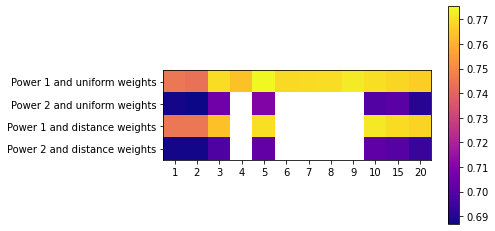

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def create_table(column_names, row_names, matrix):
    df = pd.DataFrame(matrix, columns=column_names, index=row_names)
    return df

# Exemple d'utilisation
columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '15', '20']
rows = ['Power 1 and uniform weights', 'Power 2 and uniform weights', 'Power 1 and distance weights', 'Power 2 and distance weights']
data = [[0.7456, 0.7438, 0.7695, 0.7636, 0.7753, 0.7689, 0.7693, 0.7696, 0.7725, 0.7700, 0.7683, 0.7664],
        [0.6878, 0.6869, 0.7061, None, 0.7097, None, None, None, None, 0.6994, 0.7009, 0.6909],
        [0.7456, 0.7456, 0.7635, None, 0.7699, None, None, None, None, 0.7721, 0.7691, 0.7676],
        [0.6878, 0.6878, 0.6988, None, 0.7029, None, None, None, None, 0.7023, 0.7002, 0.6939]]

tableau = create_table(columns, rows, data)

# Affichage du tableau
print(tableau)

# Création de l'image à partir du tableau
plt.imshow(tableau.values, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(columns)), columns)
plt.yticks(range(len(rows)), rows)
plt.show()

In [95]:
clf = KNeighborsClassifier(n_neighbors=5,p=1,weights='uniform')
clf.fit( dataset.train['hog'], dataset.train['labels'] )

KNeighborsClassifier(p=1)

In [96]:
pred = clf.predict(dataset.train['hog'])
score = accuracy_score(dataset.train['labels'], pred)
print("Descriptive score", score)
cm = confusion_matrix(dataset.train['labels'], pred)
print(cm)

Descriptive score 0.8526
[[4074  709  217]
 [ 229 4421  350]
 [  61  645 4294]]


In [97]:
pred = clf.predict(dataset.test['hog'])
score = accuracy_score(dataset.test['labels'], pred)
print("Descriptive score", score)
cm = confusion_matrix(dataset.test['labels'], pred)
print(cm)

Descriptive score 0.7796666666666666
[[730 218  52]
 [ 69 835  96]
 [ 18 208 774]]


## 2. Decision Trees

[Decision Trees](http://scikit-learn.org/stable/modules/tree.html#tree) classify the data by splitting the feature space according to simple, single-feature rules. Scikit-learn uses the [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29) algorithm for [its implementation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of the classifier. 

* **Create a simple Decision Tree classifier** using scikit-learn and train it on the HoG training set.
* Use cross-validation to find the best hyper-paramters for this method.

In [5]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit( dataset.train['hog'], dataset.train['labels'] )

DecisionTreeClassifier()

In [21]:
pred = clf.predict(dataset.train['hog'])
score = accuracy_score(dataset.train['labels'], pred)
print("Descriptive score", score)
cm = confusion_matrix(dataset.train['labels'], pred)
print(cm)

Descriptive score 1.0
[[5000    0    0]
 [   0 5000    0]
 [   0    0 5000]]


In [22]:
pred = clf.predict(dataset.test['hog'])
score = accuracy_score(dataset.test['labels'], pred)
print("Predictive score", score)
cm = confusion_matrix(dataset.test['labels'], pred)
print(cm)

Predictive score 0.5696666666666667
[[598 231 171]
 [208 531 261]
 [156 264 580]]


In [28]:
splitter = ["random", "best"]
criterion = ["gini", "entropy"]
min_samples_split = [0.5, 2, 3, 4]

In [29]:
for s in splitter:
    print("Splitter ", s)
    for c in criterion:
        print("Criterion ", c)
        for m in min_samples_split:
            print("Min samples split ", m)
            clf = tree.DecisionTreeClassifier(splitter=s, criterion=c, min_samples_split=m)
            scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
            mean = np.mean(scores)
            print("La moyenne est ", mean)

Splitter  random
Criterion  gini
Min samples split  0.5
La moyenne est  0.4886666666666667
Min samples split  2
La moyenne est  0.5566000000000001
Min samples split  3
La moyenne est  0.5565333333333333
Min samples split  4
La moyenne est  0.5501333333333334
Criterion  entropy
Min samples split  0.5
La moyenne est  0.4698666666666667
Min samples split  2
La moyenne est  0.5572666666666666
Min samples split  3
La moyenne est  0.5610666666666666
Min samples split  4
La moyenne est  0.5574
Splitter  best
Criterion  gini
Min samples split  0.5
La moyenne est  0.5302
Min samples split  2
La moyenne est  0.5754666666666666
Min samples split  3
La moyenne est  0.5788666666666668
Min samples split  4
La moyenne est  0.5763999999999999
Criterion  entropy
Min samples split  0.5
La moyenne est  0.5006
Min samples split  2
La moyenne est  0.5704666666666667
Min samples split  3
La moyenne est  0.5731333333333333
Min samples split  4
La moyenne est  0.5691333333333334


In [30]:
max_features=["sqrt", "log2"]
min_samples_split = [0.8, 2, 3, 4, 5]

In [31]:
for f in max_features:
    print("Max features ", f)
    for c in criterion:
        print("Criterion ", c)
        for m in min_samples_split:
            print("Min samples split ", m)
            clf = tree.DecisionTreeClassifier(splitter="best", criterion=c, min_samples_split=m, max_features=f)
            scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
            mean = np.mean(scores)
            print("La moyenne est ", mean)

Max features  sqrt
Criterion  gini
Min samples split  0.8
La moyenne est  0.4468
Min samples split  2
La moyenne est  0.5424666666666667
Min samples split  3
La moyenne est  0.5406
Min samples split  4
La moyenne est  0.5468
Min samples split  5
La moyenne est  0.5486666666666667
Criterion  entropy
Min samples split  0.8
La moyenne est  0.4267333333333333
Min samples split  2
La moyenne est  0.5506
Min samples split  3
La moyenne est  0.5436666666666667
Min samples split  4
La moyenne est  0.5445333333333333
Min samples split  5
La moyenne est  0.5526
Max features  log2
Criterion  gini
Min samples split  0.8
La moyenne est  0.43946666666666667
Min samples split  2
La moyenne est  0.5344
Min samples split  3
La moyenne est  0.5254
Min samples split  4
La moyenne est  0.5275333333333333
Min samples split  5
La moyenne est  0.5346666666666667
Criterion  entropy
Min samples split  0.8
La moyenne est  0.43406666666666666
Min samples split  2
La moyenne est  0.5360666666666666
Min samples sp

In [34]:
min_samples_split = [2, 4, 5, 7, 9, 10]

In [57]:
for f in max_features:
    print("Max features ", f)
    for c in criterion:
        print("Criterion ", c)
        for m in min_samples_split:
            print("Min samples split ", m)
            clf = tree.DecisionTreeClassifier(splitter="best", criterion=c, min_samples_split=m, max_features=f)
            scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
            mean = np.mean(scores)
            print("La moyenne est ", mean)

Max features  sqrt
Criterion  gini
Min samples split  10
La moyenne est  0.5362
Min samples split  15
La moyenne est  0.5497333333333333
Min samples split  20
La moyenne est  0.5511999999999999
Criterion  entropy
Min samples split  10
La moyenne est  0.5406666666666666
Min samples split  15
La moyenne est  0.5520666666666667
Min samples split  20
La moyenne est  0.5566000000000001
Max features  log2
Criterion  gini
Min samples split  10
La moyenne est  0.5391333333333334
Min samples split  15
La moyenne est  0.5461333333333334
Min samples split  20
La moyenne est  0.5456666666666667
Criterion  entropy
Min samples split  10
La moyenne est  0.5384666666666666
Min samples split  15
La moyenne est  0.5443333333333333
Min samples split  20
La moyenne est  0.5510666666666666


In [68]:
min_samples_split = [45, 50, 60]

In [69]:
for m in min_samples_split:
    print("Min samples split ", m)
    for c in criterion:
        print("Criterion ", c)
        clf = tree.DecisionTreeClassifier(splitter="best", criterion=c, min_samples_split=m)
        scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
        mean = np.mean(scores)
        print("La moyenne est ", mean)

Min samples split  45
Criterion  gini
La moyenne est  0.5843333333333333
Criterion  entropy
La moyenne est  0.5884
Min samples split  50
Criterion  gini
La moyenne est  0.5864
Criterion  entropy
La moyenne est  0.5874666666666666
Min samples split  60
Criterion  gini
La moyenne est  0.5874
Criterion  entropy
La moyenne est  0.5909333333333333


                   0.5     0.8       2       3       4       5      10  \
Gini & sqrt        NaN  0.4468  0.5425  0.5406  0.5468  0.5487  0.5362   
Gini & log2        NaN  0.4395  0.5344  0.5254  0.5275  0.5347  0.5391   
Gini & None     0.5302     NaN  0.5755  0.5789  0.5764  0.5752  0.5790   
Entropy & sqrt     NaN  0.4267  0.5506  0.5437  0.5445  0.5526  0.5407   
Entropy & log2     NaN  0.4341  0.5361  0.5359  0.5324  0.5346  0.5385   
Entropy & None  0.5006     NaN  0.5705  0.5731  0.5691     NaN  0.5721   

                    15      20      25      30      35      40      45  \
Gini & sqrt     0.5497  0.5512     NaN     NaN     NaN     NaN     NaN   
Gini & log2     0.5461  0.5457     NaN     NaN     NaN     NaN     NaN   
Gini & None     0.5769  0.5779  0.5806  0.5804  0.5845  0.5843  0.5843   
Entropy & sqrt  0.5521  0.5566     NaN     NaN     NaN     NaN     NaN   
Entropy & log2  0.5443  0.5511     NaN     NaN     NaN     NaN     NaN   
Entropy & None  0.5688  0.5733  0.578

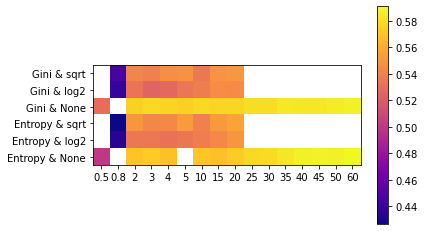

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

def create_table(column_names, row_names, matrix):
    df = pd.DataFrame(matrix, columns=column_names, index=row_names)
    return df

# Exemple d'utilisation
columns = ['0.5', '0.8', '2', '3', '4', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '60']
rows = ['Gini & sqrt', 'Gini & log2', 'Gini & None', 'Entropy & sqrt', 'Entropy & log2', 'Entropy & None']
data = [[None, 0.4468, 0.5425, 0.5406, 0.5468, 0.5487, 0.5362, 0.5497, 0.5512, None, None, None, None, None, None, None],
        [None, 0.4395, 0.5344, 0.5254, 0.5275, 0.5347, 0.5391, 0.5461, 0.5457, None, None, None, None, None, None, None],
        [0.5302, None, 0.5755, 0.5789, 0.5764, 0.5752, 0.579, 0.5769, 0.5779, 0.5806, 0.5804, 0.5845, 0.5843, 0.5843, 0.5864, 0.5874],
        [None, 0.4267, 0.5506, 0.5437, 0.5445, 0.5526, 0.5407, 0.5521, 0.5566, None, None, None, None, None, None, None],
        [None, 0.4341, 0.5361, 0.5359, 0.5324, 0.5346, 0.5385, 0.5443, 0.5511, None, None, None, None, None, None, None],
        [0.5006, None, 0.5705, 0.5731, 0.5691, None, 0.5721, 0.5688, 0.5733, 0.5788, 0.5796, 0.5844, 0.5873, 0.5884, 0.5875, 0.5909]]

tableau = create_table(columns, rows, data)

# Affichage du tableau
print(tableau)

# Création de l'image à partir du tableau
plt.imshow(tableau.values, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(columns)), columns)
plt.yticks(range(len(rows)), rows)
plt.show()

In [84]:
min_samples_split = [90, 100, 120, 140, 160, 170, 180, 190, 200, 220, 300]

In [85]:
final_list = []
for c in criterion:
    list_c = []
    print("Criterion ", c)
    for m in min_samples_split:
        print("Min samples split ", m)
        clf = tree.DecisionTreeClassifier(splitter="best", criterion=c, min_samples_split=m)
        scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
        mean = np.mean(scores)
        list_c.append(mean)
        print("La moyenne est ", mean)
    final_list.append(list_c)

Criterion  gini
Min samples split  90
La moyenne est  0.5904
Min samples split  100
La moyenne est  0.5897333333333333
Min samples split  120
La moyenne est  0.5896666666666667
Min samples split  140
La moyenne est  0.5892666666666666
Min samples split  160
La moyenne est  0.5927333333333333
Min samples split  170
La moyenne est  0.5919333333333333
Min samples split  180
La moyenne est  0.5920666666666666
Min samples split  190
La moyenne est  0.5926
Min samples split  200
La moyenne est  0.5926
Min samples split  220
La moyenne est  0.5923333333333334
Min samples split  300
La moyenne est  0.587
Criterion  entropy
Min samples split  90
La moyenne est  0.5921333333333333
Min samples split  100
La moyenne est  0.5942666666666667
Min samples split  120
La moyenne est  0.5948666666666667
Min samples split  140
La moyenne est  0.5945333333333334
Min samples split  160
La moyenne est  0.5944666666666667
Min samples split  170
La moyenne est  0.5944
Min samples split  180
La moyenne est  0.5

                      90       100       120       140       160       170  \
Gini & None     0.590400  0.589733  0.589667  0.589267  0.592733  0.591933   
Entropy & None  0.592133  0.594267  0.594867  0.594533  0.594467  0.594400   

                     180       190       200       220       300  
Gini & None     0.592067  0.592600  0.592600  0.592333  0.587000  
Entropy & None  0.594933  0.593933  0.594267  0.594467  0.591933  


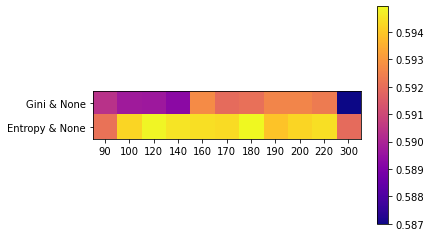

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

def create_table(column_names, row_names, matrix):
    df = pd.DataFrame(matrix, columns=column_names, index=row_names)
    return df

# Exemple d'utilisation
columns = ['90', '100', '120', '140', '160', '170', '180', '190', '200', '220', '300']
rows = ['Gini & None','Entropy & None']
data = final_list

tableau = create_table(columns, rows, data)

# Affichage du tableau
print(tableau)

# Création de l'image à partir du tableau
plt.imshow(tableau.values, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(columns)), columns)
plt.yticks(range(len(rows)), rows)
plt.show()

In [87]:
clf = tree.DecisionTreeClassifier(splitter="best", criterion="entropy", min_samples_split=180)
clf.fit( dataset.train['hog'], dataset.train['labels'] )

DecisionTreeClassifier(criterion='entropy', min_samples_split=180)

[Text(155.63870689655172, 210.645, 'X[16] <= 0.002\nentropy = 1.585\nsamples = 15000\nvalue = [5000, 5000, 5000]'),
 Text(83.98862068965516, 197.055, 'X[168] <= 0.011\nentropy = 1.479\nsamples = 6495\nvalue = [3369, 1650, 1476]'),
 Text(43.87034482758621, 183.465, 'X[224] <= 0.002\nentropy = 1.572\nsamples = 4280\nvalue = [1688, 1348, 1244]'),
 Text(23.666896551724136, 169.875, 'X[190] <= 0.004\nentropy = 1.363\nsamples = 1420\nvalue = [859, 270, 291]'),
 Text(15.008275862068965, 156.285, 'X[36] <= 0.002\nentropy = 1.212\nsamples = 1063\nvalue = [719, 222, 122]'),
 Text(9.235862068965517, 142.695, 'X[111] <= 0.001\nentropy = 1.005\nsamples = 758\nvalue = [577, 126, 55]'),
 Text(4.617931034482758, 129.10500000000002, 'X[181] <= 0.001\nentropy = 0.603\nsamples = 317\nvalue = [281, 27, 9]'),
 Text(2.308965517241379, 115.515, 'entropy = 0.884\nsamples = 121\nvalue = [95, 22, 4]'),
 Text(6.926896551724138, 115.515, 'X[27] <= 0.001\nentropy = 0.342\nsamples = 196\nvalue = [186, 5, 5]'),
 Tex

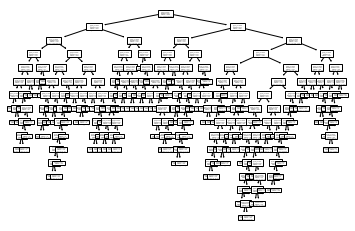

In [88]:
tree.plot_tree(clf)

In [93]:
pred = clf.predict(dataset.train['hog'])
score = accuracy_score(dataset.train['labels'], pred)
print("Descriptive score", score)
cm = confusion_matrix(dataset.train['labels'], pred)
print(cm)

Descriptive score 0.6783333333333333
[[3632  781  587]
 [ 857 2999 1144]
 [ 562  894 3544]]


In [94]:
pred = clf.predict(dataset.test['hog'])
score = accuracy_score(dataset.test['labels'], pred)
print("Predictive score", score)
cm = confusion_matrix(dataset.test['labels'], pred)
print(cm)

Predictive score 0.5976666666666667
[[663 206 131]
 [196 528 276]
 [168 230 602]]


## 3. Random Forests

[Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifiers use multiple decision trees trained on "weaker" datasets (less data and/or less features), averaging the results so as to reduce over-fitting.

* Use scikit-learn to **create a Random Forest classifier** on the CIFAR data. 
* Use cross-validation to find the best hyper-paramters for this method.

In [6]:
from sklearn import ensemble

clf = ensemble.RandomForestClassifier()
clf.fit( dataset.train['hog'], dataset.train['labels'] )

RandomForestClassifier()

In [38]:
pred = clf.predict(dataset.train['hog'])
score = accuracy_score(dataset.train['labels'], pred)
print("Descriptive score", score)
cm = confusion_matrix(dataset.train['labels'], pred)
print(cm)

Descriptive score 1.0
[[5000    0    0]
 [   0 5000    0]
 [   0    0 5000]]


In [39]:
pred = clf.predict(dataset.test['hog'])
score = accuracy_score(dataset.test['labels'], pred)
print("Predictive score", score)
cm = confusion_matrix(dataset.test['labels'], pred)
print(cm)

Predictive score 0.772
[[787 158  55]
 [121 745 134]
 [ 55 161 784]]


In [47]:
n_estimators = [50, 100, 150, 200]
bootstrap = [True, False]
class_weight = ["balanced", "balanced_subsample", None]

In [42]:
for e in n_estimators:
    print("Nb estimators ", e)
    for b in bootstrap:
        if b :
            print("Bootstrap")
        else:
            print("No bootstrap")
        clf = ensemble.RandomForestClassifier(n_estimators=e, bootstrap=b)
        scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
        mean = np.mean(scores)
        print("La moyenne est ", mean)            

Nb estimators  50
Bootstrap
La moyenne est  0.7462666666666666
No bootstrap
La moyenne est  0.7494666666666666
Nb estimators  100
Bootstrap
La moyenne est  0.7558666666666667
No bootstrap
La moyenne est  0.7628666666666666
Nb estimators  150
Bootstrap
La moyenne est  0.7661333333333333
No bootstrap
La moyenne est  0.7689333333333332
Nb estimators  200
Bootstrap
La moyenne est  0.7668666666666667
No bootstrap
La moyenne est  0.7710666666666667


In [43]:
n_estimators = [250, 300, 350]

In [44]:
for e in n_estimators:
    print("Nb estimators ", e)
    clf = ensemble.RandomForestClassifier(n_estimators=e, bootstrap=False)
    scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
    mean = np.mean(scores)
    print("La moyenne est ", mean)    

Nb estimators  250
La moyenne est  0.7719333333333334
Nb estimators  300
La moyenne est  0.7715333333333334
Nb estimators  350
La moyenne est  0.7734666666666666


In [45]:
n_estimators = [350, 400, 450]

In [46]:
for e in n_estimators:
    print("Nb estimators ", e)
    clf = ensemble.RandomForestClassifier(n_estimators=e, bootstrap=False)
    scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
    mean = np.mean(scores)
    print("La moyenne est ", mean)    

Nb estimators  350
La moyenne est  0.7761333333333333
Nb estimators  400
La moyenne est  0.7734666666666666
Nb estimators  450
La moyenne est  0.7769333333333334


In [48]:
n_estimators = [350, 400, 450, 500, 550]

In [49]:
for e in n_estimators:
    print("Nb estimators ", e)
    for w in class_weight:
        print("Class weight ", w)
        clf = ensemble.RandomForestClassifier(n_estimators=e, bootstrap=False, class_weight=w)
        scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
        mean = np.mean(scores)
        print("La moyenne est ", mean)    

Nb estimators  350
Class weight  balanced
La moyenne est  0.7738666666666666
Class weight  balanced_subsample
La moyenne est  0.7742000000000001
Class weight  None
La moyenne est  0.7723333333333333
Nb estimators  400
Class weight  balanced
La moyenne est  0.7733333333333333
Class weight  balanced_subsample
La moyenne est  0.7748666666666668
Class weight  None
La moyenne est  0.7734666666666667
Nb estimators  450
Class weight  balanced
La moyenne est  0.7756
Class weight  balanced_subsample
La moyenne est  0.7748666666666667
Class weight  None
La moyenne est  0.7755333333333334
Nb estimators  500
Class weight  balanced
La moyenne est  0.7754
Class weight  balanced_subsample
La moyenne est  0.7750666666666668
Class weight  None
La moyenne est  0.7754666666666666
Nb estimators  550
Class weight  balanced
La moyenne est  0.7771333333333332
Class weight  balanced_subsample
La moyenne est  0.7746666666666666
Class weight  None
La moyenne est  0.7757333333333334


In [99]:
n_estimators = [100, 200, 300, 400, 500, 600]
criterion = ["gini", "entropy"]
min_samples_split = [2, 10, 50, 100, 200, 300]

In [ ]:
final_list = []
for c in criterion:
    list_crit = []
    print("Criterion ", c)
    for min_s in min_samples_split:
        print("Min sample ", min_s)
        list_crit.append([])
        for n in n_estimators:
            print("Nb estimators ", n)
            clf = ensemble.RandomForestClassifier(n_estimators=n, bootstrap=False, criterion=c, min_samples_split=min_s)
            scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
            mean = np.mean(scores)
            list_crit[-1].append(mean)
            print("La moyenne est ", mean)
    final_list.append(list_crit)

Criterion  gini
Min sample  2
Nb estimators  100
La moyenne est  0.7632
Nb estimators  200
La moyenne est  0.7721333333333333
Nb estimators  300
La moyenne est  0.7719333333333334
Nb estimators  400
La moyenne est  0.7758
Nb estimators  500
La moyenne est  0.7737333333333334
Nb estimators  600
La moyenne est  0.7744
Min sample  10
Nb estimators  100
La moyenne est  0.7646666666666666
Nb estimators  200
La moyenne est  0.7691333333333334
Nb estimators  300
La moyenne est  0.7722
Nb estimators  400
La moyenne est  0.7728666666666666
Nb estimators  500
La moyenne est  0.7746666666666666
Nb estimators  600
La moyenne est  0.7749333333333333
Min sample  50
Nb estimators  100
La moyenne est  0.7573333333333334
Nb estimators  200
La moyenne est  0.7577333333333334
Nb estimators  300
La moyenne est  0.7621333333333333
Nb estimators  400
La moyenne est  0.7626
Nb estimators  500
La moyenne est  0.7646
Nb estimators  600
La moyenne est  0.7636666666666667
Min sample  100
Nb estimators  100
La mo

In [1]:
n_estimators = [100, 200, 300, 400, 500, 600]
criterion = ["entropy"]
min_samples_split = [2, 10, 50, 100, 200, 300]

In [ ]:
final_list2 = []
for c in criterion:
    list_crit = []
    print("Criterion ", c)
    for min_s in min_samples_split:
        print("Min sample ", min_s)
        list_crit.append([])
        for n in n_estimators:
            print("Nb estimators ", n)
            clf = ensemble.RandomForestClassifier(n_estimators=n, bootstrap=False, criterion=c, min_samples_split=min_s)
            scores = cross_val_score(clf,dataset.train['hog'],dataset.train['labels'])
            mean = np.mean(scores)
            list_crit[-1].append(mean)
            print("La moyenne est ", mean)
    final_list2.append(list_crit)

Criterion  entropy
Min sample  2
Nb estimators  100
